# Preprocessing + EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read Dataset

In [3]:
df_19 = pd.read_csv('../data/listings_2019.csv')
df_18 = pd.read_csv('../data/listings_2018.csv')

In [4]:
df_19.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190922191643,2019-09-22,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.36524,-71.02936,t,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,30,30,1125,1125,30.0,1125.0,3 months ago,t,0,21,51,141,2019-09-22,15,1,2015-07-10,2019-02-22,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Massachusetts State"","" Massachusetts State""}",f,f,super_strict_30,f,f,2,2,0,0,0.29
1,6976,https://www.airbnb.com/rooms/6976,20190922191643,2019-09-22,Mexican Folk Art Showcase in Boston Neighborhood,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,"There is no smoking allowed, inside the apartm...","PUBLIC TRANSPORTATION: From the house, quick p...","You can have access to your room, the adjacent...",ABOUT ME: I am one of the original Boston AIRB...,I require my guests to have a verified email a...,NaN,NaN,https://a0.muscache.com/im/pictures/85bf0653-b...,NaN,16701,https://www.airbnb.com/users/show/16701,Phil,2009-05-11,"Boston, Massachusetts, United States","I am a middle-aged, single male with a wide ra...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictur

In [5]:
df_19.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url   

In [6]:
df_18.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 96 columns):
id                                  6217 non-null int64
listing_url                         6217 non-null object
scrape_id                           6217 non-null int64
last_scraped                        6217 non-null object
name                                6216 non-null object
summary                             6004 non-null object
space                               4732 non-null object
description                         6169 non-null object
experiences_offered                 6217 non-null object
neighborhood_overview               4216 non-null object
notes                               3632 non-null object
transit                             4397 non-null object
access                              3723 non-null object
interaction                         4011 non-null object
house_rules                         4182 non-null object
thumbnail_url                       0 no

## Data Preprocessing 

### Delete Useless Columns

In [7]:
# Extract columns we need
col = ['id', 'name', 'summary', 'space', 
       'neighborhood_overview', 'transit', 'host_id', 
       'neighbourhood_cleansed', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 
       'price', 'weekly_price', 'monthly_price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
      'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

In [8]:
data_19 = df_19[col]
data_18 = df_18[col]

In [9]:
data_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 27 columns):
id                                5711 non-null int64
name                              5710 non-null object
summary                           5570 non-null object
space                             4285 non-null object
neighborhood_overview             3922 non-null object
transit                           3736 non-null object
host_id                           5711 non-null int64
neighbourhood_cleansed            5711 non-null object
latitude                          5711 non-null float64
longitude                         5711 non-null float64
room_type                         5711 non-null object
accommodates                      5711 non-null int64
bathrooms                         5708 non-null float64
bedrooms                          5708 non-null float64
price                             5711 non-null object
weekly_price                      458 non-null object
monthly_price

In [10]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 27 columns):
id                                6217 non-null int64
name                              6216 non-null object
summary                           6004 non-null object
space                             4732 non-null object
neighborhood_overview             4216 non-null object
transit                           4397 non-null object
host_id                           6217 non-null int64
neighbourhood_cleansed            6217 non-null object
latitude                          6217 non-null float64
longitude                         6217 non-null float64
room_type                         6217 non-null object
accommodates                      6217 non-null int64
bathrooms                         6211 non-null float64
bedrooms                          6210 non-null float64
price                             6217 non-null object
weekly_price                      565 non-null object
monthly_price

### Deal with Missing Values

In [11]:
data_19.isnull().sum()

id                                   0
name                                 1
summary                            141
space                             1426
neighborhood_overview             1789
transit                           1975
host_id                              0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
accommodates                         0
bathrooms                            3
bedrooms                             3
price                                0
weekly_price                      5253
monthly_price                     5278
cleaning_fee                       883
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
reviews_per_month        

In [12]:
data_19.fillna({'reviews_per_month':0}, inplace=True)
data_19.fillna({'name':'Unknown'}, inplace=True)
data_19.fillna({'summary':'Unknown'}, inplace=True)
data_19.fillna({'neighborhood_overview':'Unknown'}, inplace=True)

# Examing changes
data_19.isnull().sum()

/Users/gaotian/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


id                                   0
name                                 0
summary                              0
space                             1426
neighborhood_overview                0
transit                           1975
host_id                              0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
accommodates                         0
bathrooms                            3
bedrooms                             3
price                                0
weekly_price                      5253
monthly_price                     5278
cleaning_fee                       883
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
reviews_per_month        

In [13]:
# Remove '$' and ',' in price
data_19['price'] = data_19['price'].str.replace('$', '')
data_19['price'] = data_19['price'].str.replace(',', '')

# Convert the type of price to float
data_19['price'] = pd.to_numeric(data_19['price'], errors='raise')

/Users/gaotian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gaotian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gaotian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

#### Q1: How many listings are in each neighborhood in Boston?

Text(0.5,1,'Number of Listings in Each Neighbourhood')

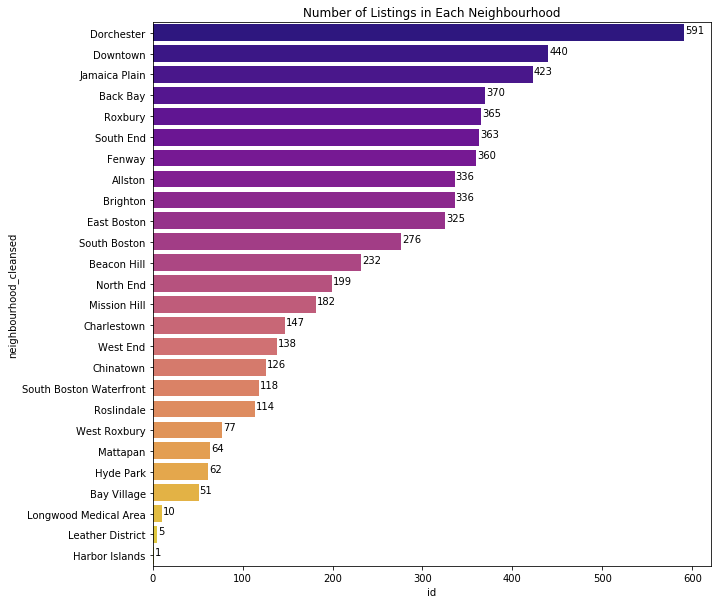

In [14]:
neighborRank = data_19.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)
plt.figure(figsize=(10,10))
g = sns.barplot(y=neighborRank.index,x=neighborRank["id"], palette="plasma")

# Adds the value label in each bar
[g.text(p[1] + 1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighborRank["id"])]
plt.title('Number of Listings in Each Neighbourhood')

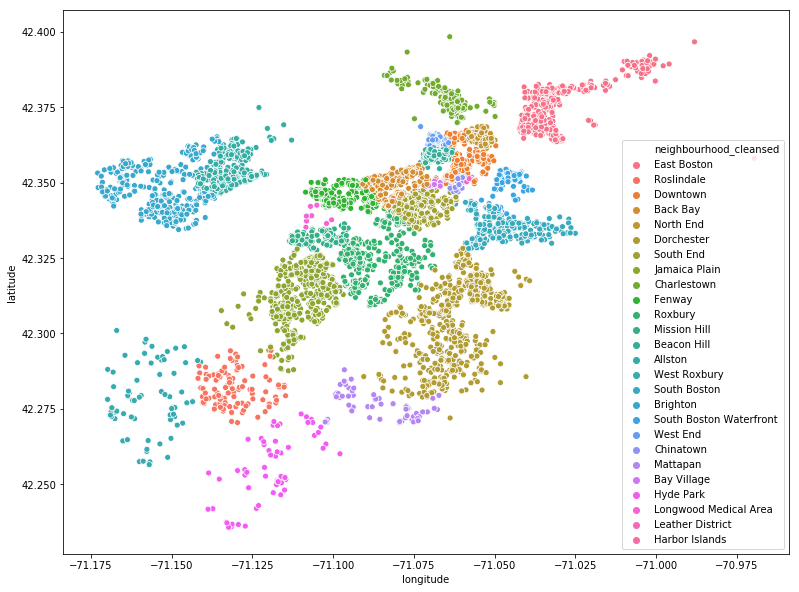

In [15]:
# Scatter plot using coordinates  
plt.figure(figsize=(13,10))
sns.scatterplot(data_19.longitude, data_19.latitude, hue=data_19.neighbourhood_cleansed)
plt.ioff()

#### Q2: How does the number of listings change from 2018 to 2019?

Text(0.5,1,'Number of Listings in Each Neighbourhood')

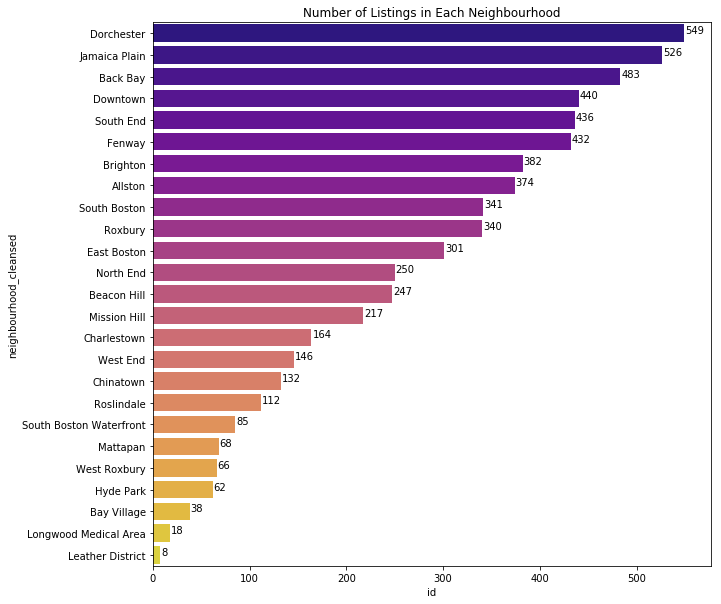

In [16]:
neighborRank = data_18.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)
plt.figure(figsize=(10,10))
g = sns.barplot(y=neighborRank.index,x=neighborRank["id"], palette="plasma")

# Adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighborRank["id"])]
plt.title('Number of Listings in Each Neighbourhood')

#### Q3: Which type of room are popular in Boston?

Text(0.5,1,'Room Types')

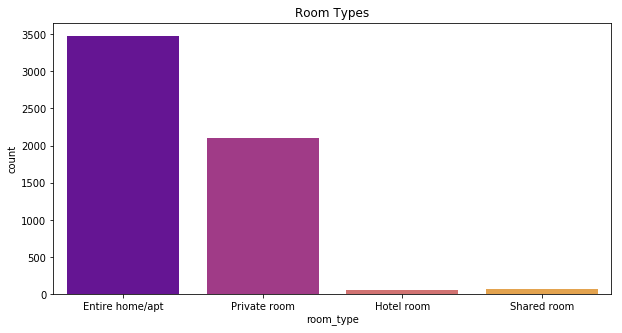

In [17]:
sns.countplot(data_19['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Room Types')

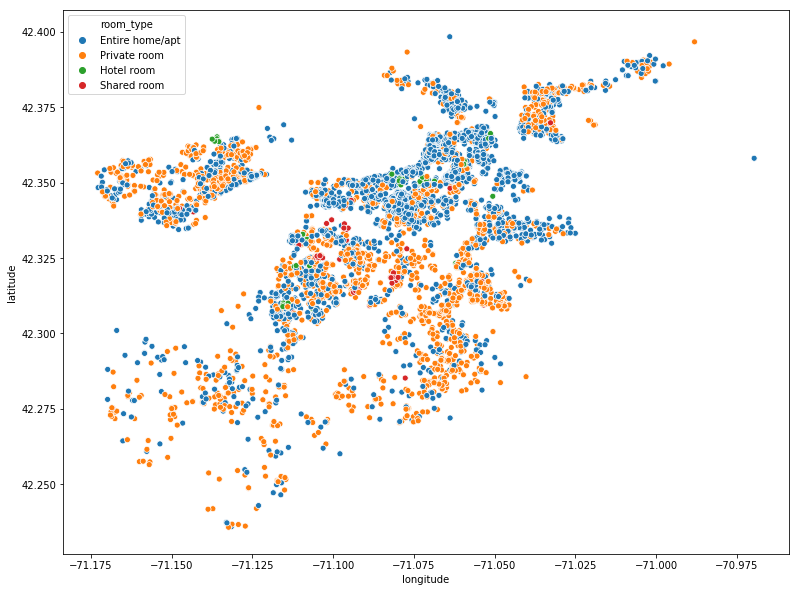

In [18]:
# Scatter plot using coordinates
plt.figure(figsize=(13,10))
sns.scatterplot(data_19.longitude, data_19.latitude, hue=data_19.room_type)
plt.ioff()

#### Q4: Which attributes affect the price of Airbnb most?

Index(['id', 'name', 'summary', 'space', 'neighborhood_overview', 'transit',
       'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price',
       'weekly_price', 'monthly_price', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count'],
      dtype='object')

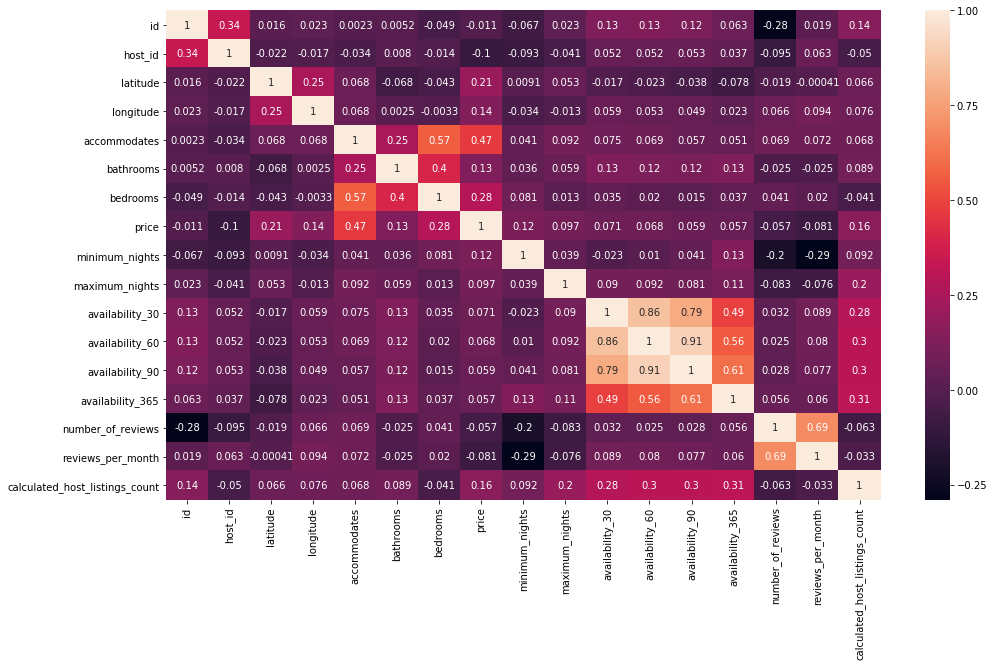

In [19]:
corr = data_19.corr(method='kendall')
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)
data_19.columns

#### Q5: Which areas are popular in Boston?

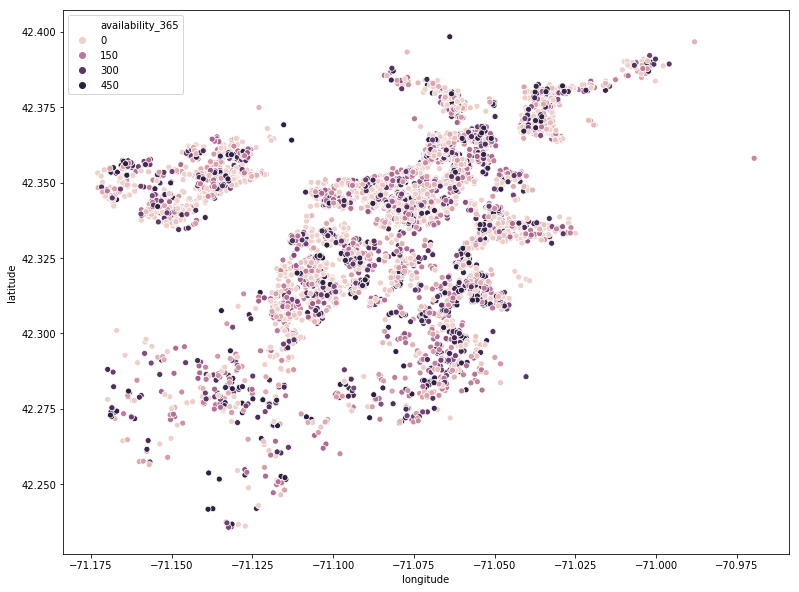

In [20]:
plt.figure(figsize=(13,10))
sns.scatterplot(data_19.longitude, data_19.latitude, hue=data_19.availability_365)
plt.ioff()